# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('breast-cancer.txt')
X = X.toarray()
print(X)
print(y)

[[1.000025e+06 5.000000e+00 1.000000e+00 ... 3.000000e+00 1.000000e+00
  1.000000e+00]
 [1.002945e+06 5.000000e+00 4.000000e+00 ... 3.000000e+00 2.000000e+00
  1.000000e+00]
 [1.015425e+06 3.000000e+00 1.000000e+00 ... 3.000000e+00 1.000000e+00
  1.000000e+00]
 ...
 [8.888200e+05 5.000000e+00 1.000000e+01 ... 8.000000e+00 1.000000e+01
  2.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 1.000000e+01 6.000000e+00
  1.000000e+00]
 [8.974710e+05 4.000000e+00 8.000000e+00 ... 1.000000e+01 4.000000e+00
  1.000000e+00]]
[2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 4. 4. 4. 4. 4. 2. 4. 2. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 4. 2. 2. 2. 2.
 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2.
 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 4. 

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [2]:
#1.1
import numpy as np
print('y before: \n', y)
y = np.where(y!=2, y, -1)
y = np.where(y!=4, y, 1)
print('y after: \n', y)

#1.2
X = np.array(X)
print('X before: \n', X)
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
print('X after: \n', X)

y before: 
 [2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4. 4. 2. 2.
 4. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2. 4. 4. 4. 4. 4. 4. 2. 4. 2. 2. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 4. 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 4.
 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 4. 4. 4. 4. 2. 4. 4. 4. 4. 4. 2. 4. 2. 4. 4. 4. 2. 2. 2. 4. 2. 2. 2. 2.
 4. 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2.
 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 4. 4. 2. 2. 2. 2. 4. 4. 2. 2. 2. 2. 2. 4.
 4. 4. 2. 4. 2. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 4. 4. 2. 2. 2. 2. 2. 2.
 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 2. 2. 4. 4. 2. 4. 4. 4. 2. 2. 4. 2. 2. 4.
 4. 4. 4. 2. 4. 4. 2. 4. 4. 4. 2. 4. 2. 4. 4. 4. 4. 2. 2. 2. 2. 2. 2. 4.
 4. 2. 2. 4. 2. 4. 4. 4. 2. 2. 2. 2. 4. 4. 4. 4. 4. 2. 4. 4. 4. 2. 4. 2.
 4. 4. 2. 2. 2. 2. 4. 2. 2. 4. 4. 4. 4. 4. 2. 4. 4. 2. 2. 4. 4. 2. 2. 4.
 4. 2. 4. 2. 4. 4. 2. 2. 4. 2. 2. 2. 4. 2. 2. 4. 4. 2. 2. 4. 2. 4. 2. 2.
 4. 2. 4. 4. 4. 2. 2. 4. 4. 2. 4. 2. 2.

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

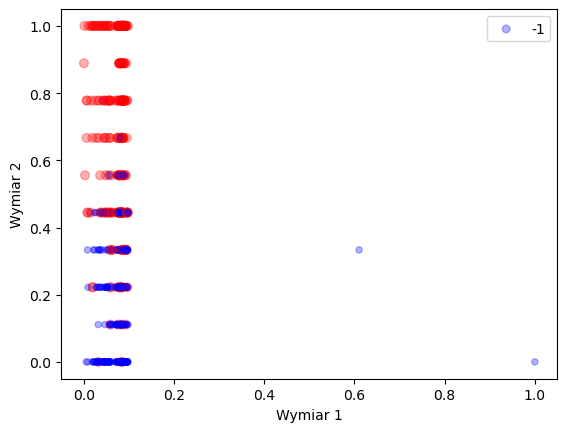

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = np.where(y == -1, 'blue', 'red')
sizes = np.where(y == -1, 20, 40)
alpha_value = 0.3

plt.scatter(X[:, 0], X[:, 1], c=colors, s=sizes, alpha=alpha_value)

plt.xlabel('Wymiar 1')
plt.ylabel('Wymiar 2')
plt.legend(['-1', '+1'])

plt.show()

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [4]:
def regresja_lin(arr, y):
    return np.linalg.inv(arr.transpose() @ arr) @ arr.transpose() @ y
print(regresja_lin(X, y))

[-6.99534089 -0.18099245  0.98590886  0.42019705  0.10457698 -0.59830206
  0.85739125 -0.31840576  0.47729336  0.16637872]


### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

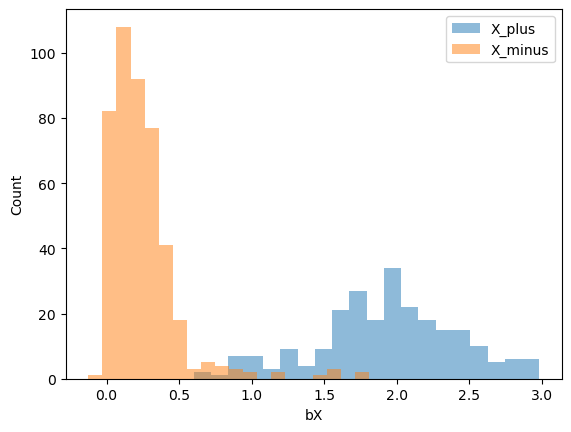

In [5]:

# X_plus = []
# X_minus = []
# for i in range(len(y)):
#     if(y[i]==1):
#         X_plus.append(X[i])
#     else:
#         X_minus.append(X[i])
# regr_lin_X_plus = regresja_lin(np.array(X_plus), np.full((len(X_plus), 10), 1))
# regr_lin_X_minus = regresja_lin(np.array(X_minus),np.full((len(X_minus), 10), -1))
# print(regr_lin_X_minus)
# print(regr_lin_X_plus)]

X_extended = np.column_stack([np.ones(X.shape[0]), X])
b = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
y_pred = X_extended @ b

X_plus = X[y == 1]
X_minus = X[y == -1]

bX_plus = X_plus @ b[1:]  
bX_minus = X_minus @ b[1:] 

plt.hist(bX_plus, alpha=0.5, label='X_plus', bins=20)
plt.hist(bX_minus, alpha=0.5, label='X_minus', bins=20)

plt.legend()
plt.xlabel('bX')
plt.ylabel('Count')
 
plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [7]:
y_pred = X_extended @ b
y_pred_class = np.where(y_pred > 0, 1, -1)
print(y_pred_class)

[-1  1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1 -1 -1
  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1
 -1 -1  1  1  1  1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1  1  1 -1 -1 -1  1 -1  1  1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1
  1  1  1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1
 -1  1 -1  1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1
 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1 -1  1
 -1  1  1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1  1
  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1 -1  1 -1
  1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1  1
  1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1 -1  1  1 -1  1 -1 -1
  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1  1 -1 -1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [8]:
dokladnosc = np.sum(y_pred_class == y) / len(y)
print(dokladnosc * 100, "%")

96.04685212298682 %


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [10]:
C=0.000008
b_C = np.linalg.inv(X_extended.T @ X_extended + 1/C*np.identity(11)) @ X_extended.T @ y

y_pred = X_extended @ b_C
y_pred_class = np.where(y_pred > 0, 1, -1)
dokladnosc = np.sum(y_pred_class == y) / len(y)
print(dokladnosc * 100, "%")

97.36456808199122 %


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [11]:
import numpy as np

class LRClassifier:
    def __init__(self, C=1.0, scale=True):
        self.C = C
        self.scale = scale
        self.b = None
        self.mean = None
        self.std = None

    def fit(self, X, y):
        if self.scale:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
            X_scaled = self._scale(X)
        else:
            X_scaled = X

        X_extended = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
        self.b = self._linear_regr(X_extended, y)

    def predict(self, X):
        if self.scale:
            X_scaled = self._scale(X)
        else:
            X_scaled = X

        X_extended = np.column_stack([np.ones(X_scaled.shape[0]), X_scaled])
        return self._predict(X_extended)

    def _scale(self, X):
        ind = np.where(self.std == 0)[0]
        self.std[ind] = 1.0
        return (X - self.mean) / self.std

    def _linear_regr(self, X, y):
        regularization_term = (1 / self.C) * np.identity(X.shape[1])
        return np.linalg.inv(X.T @ X + regularization_term) @ X.T @ y

    def _predict(self, X):
        y_pred = X @ self.b
        return np.where(y_pred >= 0, 0, 1)  
   

clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array([0, 0, 1, 1, 1])  
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X))

[1 0 0]
